# 1. Preparacion de datos 

In [3]:
# Importamos las librerias necesarias
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Las librerias se importan a medida se requiera segun el analisis

In [5]:
# Definimos la ruta donde se encuentra el dataset
ruta = r'/Users/andresjimenez/Proyectos Machine Learning/Machine Learning para analisis predictivo de una tienda minorista/ventas.csv'

# Creamos el dataset utilizando pandas 
df = pd.read_csv(ruta)
df

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


In [7]:
# Comprobamos si existen valores faltantes o valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [9]:
# Ahora vamos a convertir la columna 'Fecha' a tipo datetime utilizando to_datetime
df['Fecha'] =  pd.to_datetime(df['Fecha'])
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [11]:
# Creamos la variable escala con el preprocessing 
escala = MinMaxScaler(feature_range=(0, 1))

# Eliminamos las columnas no deseadas y guardamos los nombres de las columnas que vamos a escalar
columnas_para_escalar = df.drop(['Ventas', 'Fecha'], axis=1).columns

# Ajustamos el MinMinMaxScaler a las columnas restantes y transformamos los datos
normado = escala.fit_transform(df[columnas_para_escalar])

# Creamos un nuevo DataFrame con los datos normalizados (normados) y las columnas correctas
df_normado = pd.DataFrame(data=normado, columns=columnas_para_escalar)

# Si es necesario, agregamos las columnas no escaldas que quitamos previamente
df_normado['Ventas'] = df['Ventas']
df_normado['Fecha'] = df['Fecha']

# Ahora df_normado tiene los datos normalizados y las columnas no normalizadas originales
df_normado.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


In [15]:
# Comprobamos el tipo de dato de 'Fecha'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [18]:
# Identificamos las variables dependientes e independientes
X = df_normado.drop(['Ventas', 'Fecha'], axis=1)
y = df['Ventas']

In [20]:
# Dividimos en conjuntos de entrenamiento y prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.8, random_state=42)

# 2. Analisis Exploratorio de datos (EDA)

In [23]:
# Estadisticas descriptivas 
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


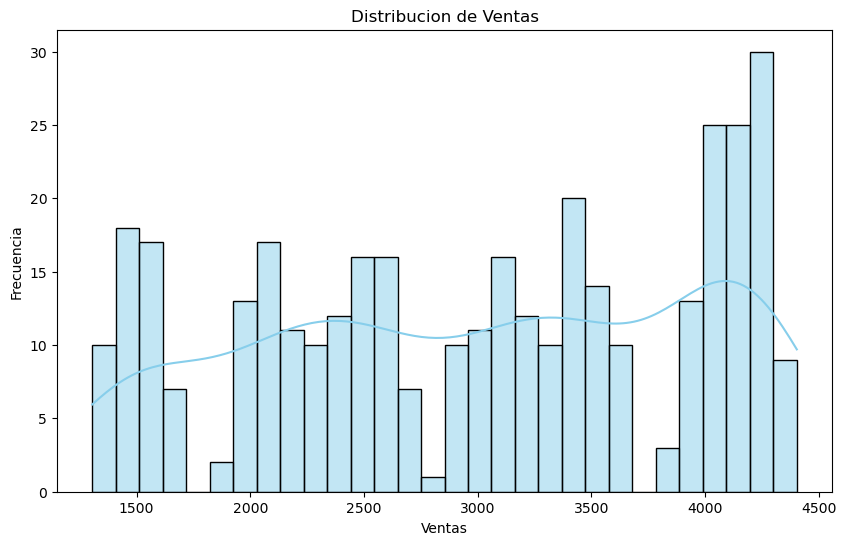

In [27]:
# Creamos el primer grafico de visualizacion de la distribucion de ventas 
plt.figure(figsize=(10, 6))
sns.histplot(df['Ventas'], bins=30, kde=True, color='skyblue')
plt.title("Distribucion de Ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia");

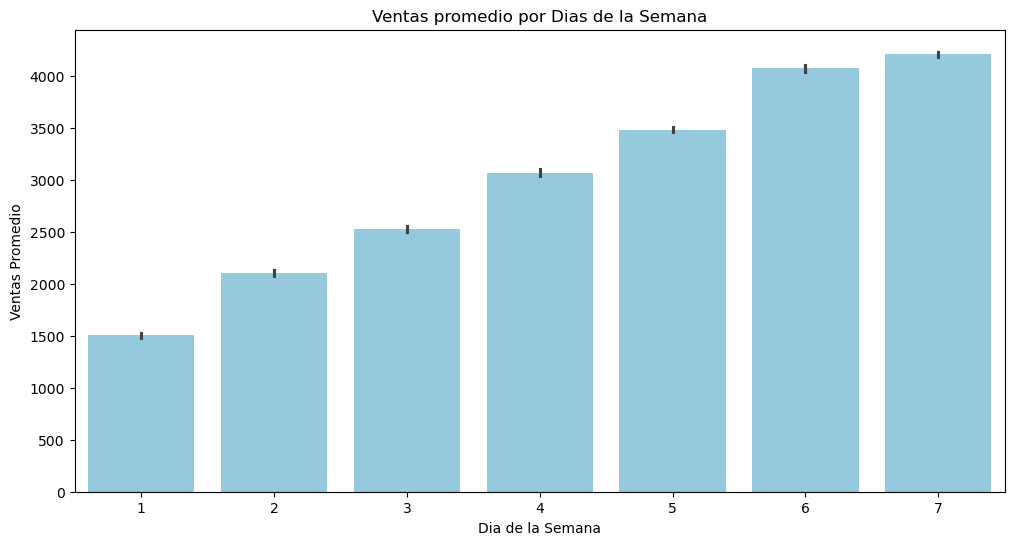

In [59]:
# Grafico de barras para la relacion entre ventas y dia de la semana con promedio de ventas
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='DíaDeLaSemana', y='Ventas', color='skyblue')
plt.title("Ventas promedio por Dias de la Semana")
plt.xlabel("Dia de la Semana")
plt.ylabel("Ventas Promedio");

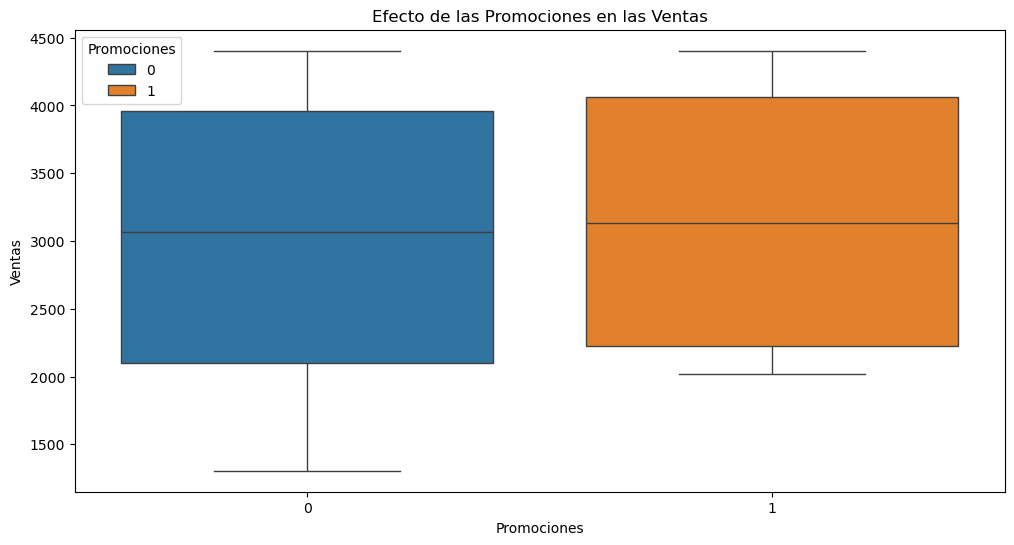

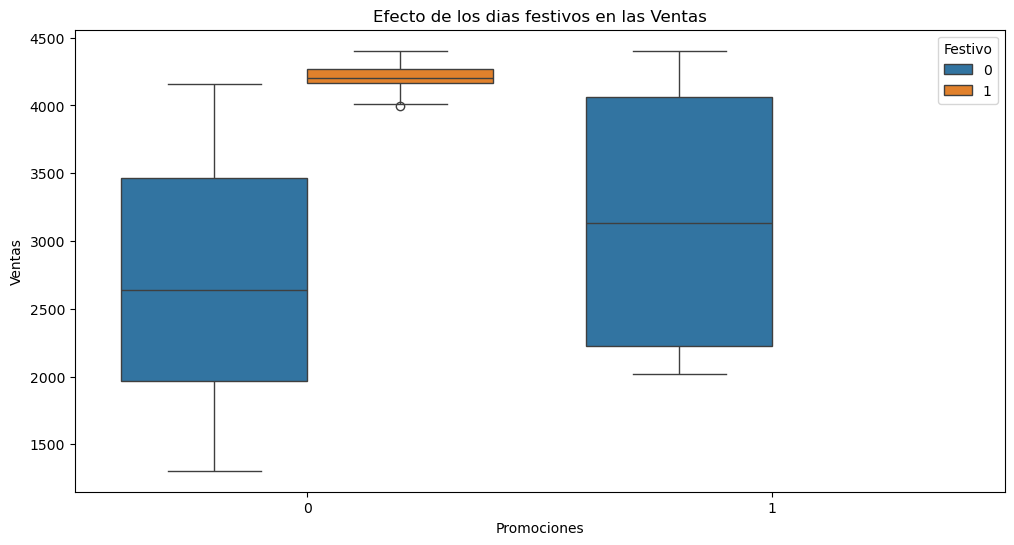

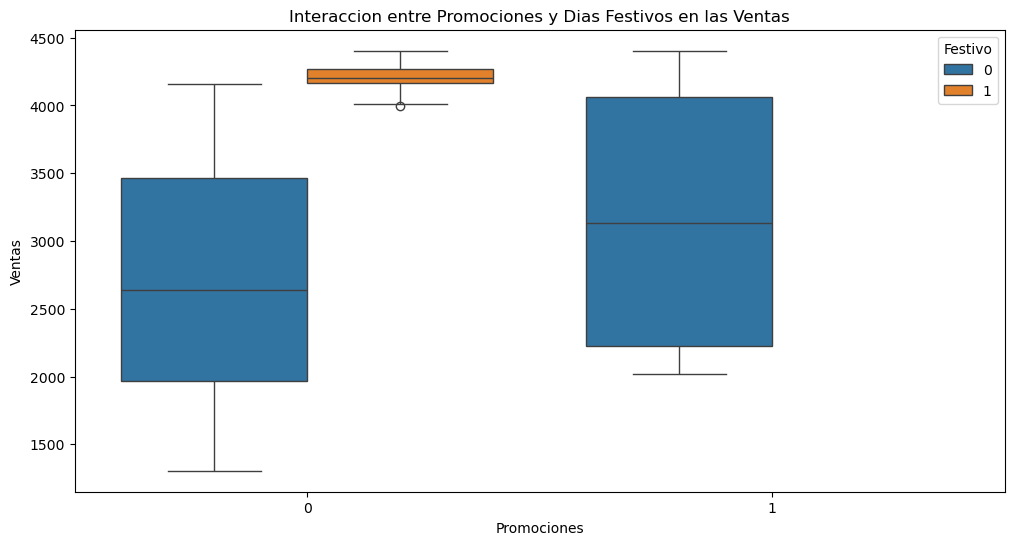

In [73]:
# Utilizamos un boxplot para compara las ventas con y sin promociones
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promociones', y='Ventas', data=df, hue='Promociones')
plt.title("Efecto de las Promociones en las Ventas")

# El boxplot para comparar las ventas de los dias normales y festivos.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promociones', y='Ventas', hue='Festivo', data=df)
plt.title("Efecto de los dias festivos en las Ventas")

# El boxplot para ver la interaccion entre promociones y dias festivos en las ventas. 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promociones', y='Ventas', hue='Festivo', data=df)
plt.title("Interaccion entre Promociones y Dias Festivos en las Ventas");

# 3. Seleccion de modelo

In [76]:
# Almacenamos los modelos en una variable (modelos) que contiene una lista
modelos = [
    ('modelo lineal', LinearRegression()),
    ('modelo arbol', DecisionTreeRegressor(random_state=42)),
    ('modelo bosque', RandomForestRegressor(random_state=42))
]

In [78]:
# Entrenamos los modelos y mostramos los puntajes asociados al entrenamiento en un loop for
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f"{nombre}: {puntaje}")

modelo lineal: 0.9924245101323563
modelo arbol: 0.9923508015371342
modelo bosque: 0.9923097376813321


# 4. Entrenamiento y evaluacion del modelo 

In [85]:
# Alojamos el modelo de Regresion Lineal en una variable (modelo_lineal)
modelo_lineal = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento 
modelo_lineal.fit(X_entrena, y_entrena)

# Realizamos predicciones usando el conjunto de prueba
predicciones_lineal = modelo_lineal.predict(X_prueba)

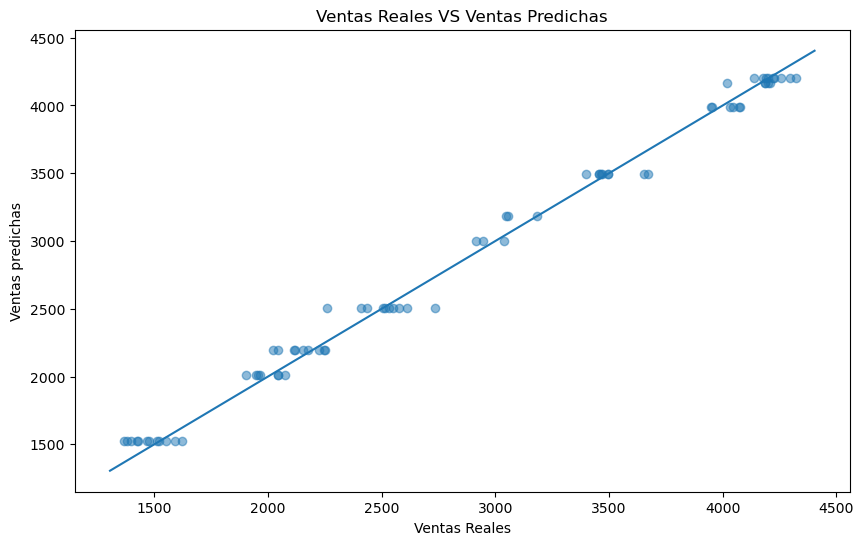

In [89]:
# Scatter para visualizar las ventas reales vs las ventas predichas
plt.figure(figsize=(10, 6))
plt.scatter(y_prueba, predicciones_lineal, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Ventas Reales")
plt.ylabel("Ventas predichas")
plt.title("Ventas Reales VS Ventas Predichas");

In [91]:
# realizamos los test en un nuevo DataFrame
df_test = pd.DataFrame({'Real': y_prueba, 'Predicho': predicciones_lineal})
df_test = df_test.sort_index()

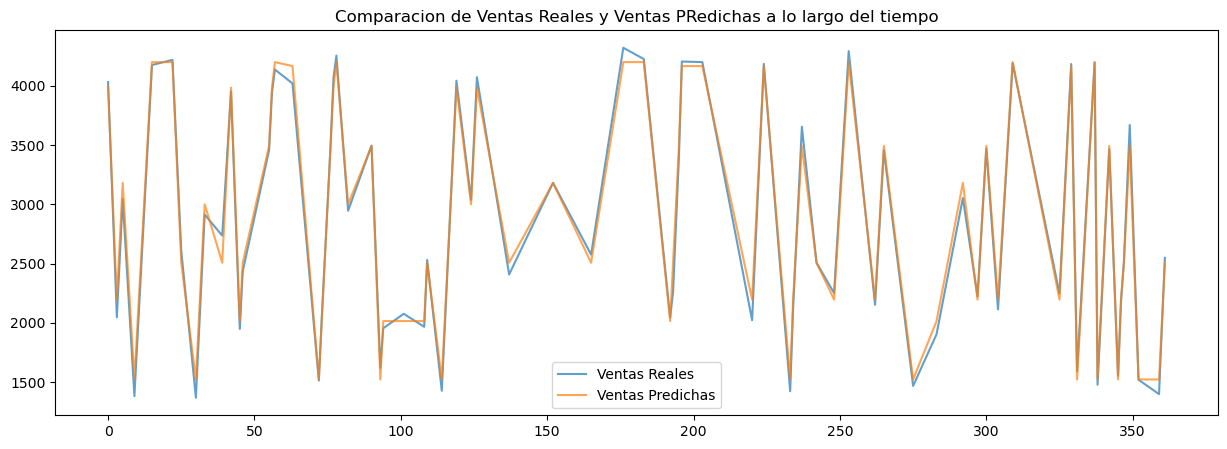

In [93]:
# Realizamos una comparacion de Ventas Reales y Ventas PRedichas a lo largo del tiempo
plt.figure(figsize=(15, 5))
plt.plot(df_test['Real'], label='Ventas Reales', alpha=0.7)
plt.plot(df_test['Predicho'], label='Ventas Predichas', alpha=0.7)
plt.legend()
plt.title("Comparacion de Ventas Reales y Ventas PRedichas a lo largo del tiempo");